In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipynb.fs.full.jean.types import extension, nominal

ipynb.fs.full.jean.common._2dual_status:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
ipynb.fs.full.jean.common._2dual_status:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
ipynb.fs.full.jean.common._2dual_status:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
ipynb.fs.full.jean.common._2dual_status:17: SettingWith

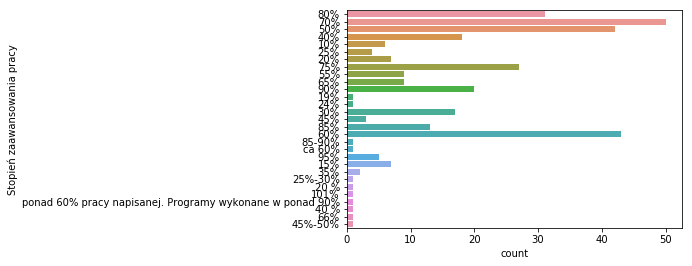

In [2]:
_ = sns.countplot(y=extension['Stopień zaawansowania pracy'])

In [3]:
import re
from statistics import mean

progress = {
    'ponad 60% pracy napisanej. Programy wykonane w ponad 90%': 0.75,
    'ca 60%': 0.6,
    '101%': np.nan
}

def parse_percent(s):
    r = re.match('^((\d\d)%?-(\d\d)%)|((\d\d)(\s*)%)$', s)
    percent = int(r[5]) if r[5] != None else mean([int(r[2]), int(r[3])])
    return percent / 100
parse_progress = lambda x: progress.get(x) if progress.get(x) else parse_percent(x)

extension['Stopień zaawansowania pracy'] = extension['Stopień zaawansowania pracy'].dropna().apply(parse_progress)

In [4]:
def drop_single_val_cols(df): 
    return df[[c for c in df.columns if len(df[c].unique()) > 1]]

In [5]:
dropext = ['Brakujace przedmioty', 'Data złożenia', 'Data zamknięcia']
e = extension.drop(dropext, 'columns').drop(extension[extension['Stopień zaawansowania pracy'].isnull()].index)
e = drop_single_val_cols(e)

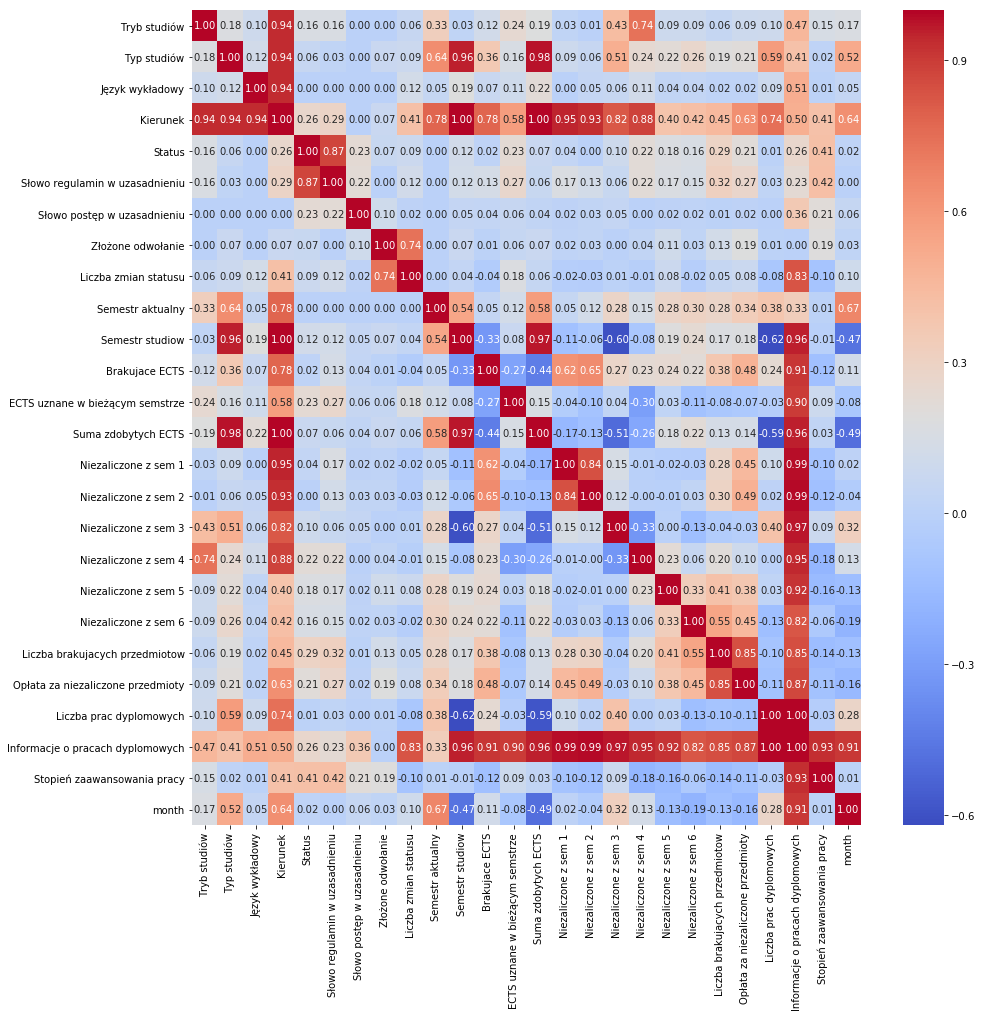

In [6]:
from dython.nominal import associations

plt.figure(figsize=(15, 15))
sns.heatmap(associations(e, nominal_columns=nominal, theils_u=True, plot=False, return_results = True),
           cmap='coolwarm', annot=True, fmt='.2f')
plt.show()